## Import packages and modules needed

In [ ]:
import pandas as pd
import json
import csv
import os
import numpy as np
import csv
import pprint

In [3]:
import string
import re

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Overall Analysis: Sentiment, Topic Modeling, % retweets, with links, etc.

This notebook serves to do general analysis of the genuine tweet dataset. First starting with sentiment analysis using the tweet module of Python, topic modeling using Latent Dirichlet Allocation Modeling, and a general breakdown of the types of tweets in the corpus.

## 1. Sentiment Analysis

In [13]:
sentiment_types = ['neg', 'neu', 'compound']
sentiment_data = []

In [14]:
retweet_data = []
url_data = []

In [15]:
def get_tweet_sentiment(text):
    sentiment_dict = sid_obj.polarity_scores(text)
    return sentiment_dict

In [16]:
sid_obj = SentimentIntensityAnalyzer()

In [17]:
ignore = ['retweet_analysis.ipynb', 'retweet_analysis-checkpoint.ipynb', '.DS_Store', 'url_analysis.ipynb', 'url_analysis-checkpoint.ipynb', 'genuine_sentiments.csv', 'general_analysis-checkpoint.ipynb', 'cleaning-checkpoint.ipynb','hashtag_analysis-checkpoint.ipynb', 'sampling-checkpoint.ipynb', 'general_analysis.ipynb', 'hashtag_analysis.ipynb']
for dirs, subdir, files in os.walk (os.getcwd()):
    for f in files:
        if f not in ignore:
            print(f)
            with open(f) as datafile: 
                tweets = json.load(datafile)
            for tweet in tweets:
                # sentiment analysis
                if tweet.get('text') != None and tweet.get('created_at') != None:
                    content = str(tweet['text'])
                    sentiment_dict = get_tweet_sentiment(content)
                    sentiment_data.append([tweet['created_at'], tweet['text'], sentiment_dict['pos'], sentiment_dict['neg'], sentiment_dict['neu'], sentiment_dict['compound']])  
                #if tweet.get('text') != None and tweet.get('created_at') != None:
                #    if tweet.get('entities') != None and tweet['entities']['urls'] != None and len(tweet['entities']['urls']) > 0:
                #        url_data.append([tweet['created_at'], 1])
                #    else:
                #        url_data.append([tweet['created_at'], 0])
                    

sampled10_31_1r.json
sampled10_28_1r.json
sampled10_24_1.json
sampled10_29_1r.json
sampled10_23_2r.json
10_22_2.json
sampled10_30_1r.json
sampled11_01_2.json
sampled10_25.json
sampled10_27_2.json
sampled10_22_1.json
sampled10_31_2r.json
10_21.json
sampled10_28_2r.json
sampled10_23_1r.json
sampled10_29_2r.json
sampled10_20.json
sampled10_26_1r.json
sampled10_27_1.json
sampled11_01_1.json
sampled10_26_2r.json
sampled10_24_2.json


In [22]:
df = pd.DataFrame(sentiment_data, columns = ['date', 'text', 'sentiment_pos', 'sentiment_neg', 'sentiment_neu', 'sentiment_compound']) 
#df.to_csv("genuine_sentiments.csv", index=False)


In [136]:
with open("sampled10_20.json") as datafile:
    tweets = json.load(datafile)

In [158]:
url_df = pd.DataFrame(url_data, columns = ['date', 'has_url']) 
url_df.set_index('date')

In [162]:
test_df3 = pd.concat([test_df2, url_df], axis=1)

### Analysis

In [20]:
with open("genuine_sentiments.csv") as file:
    df = pd.read_csv(file)

In [21]:
df['date'] = pd.to_datetime(df['date'])
plot_df = df.set_index('date')

ParserError: Unknown string format: #HillBullies @HillaryClinton #HillaryForPrision #LockHerUp https://t.co/K4MFoJHjiZ

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1f9be5190>,
      dtype=object)

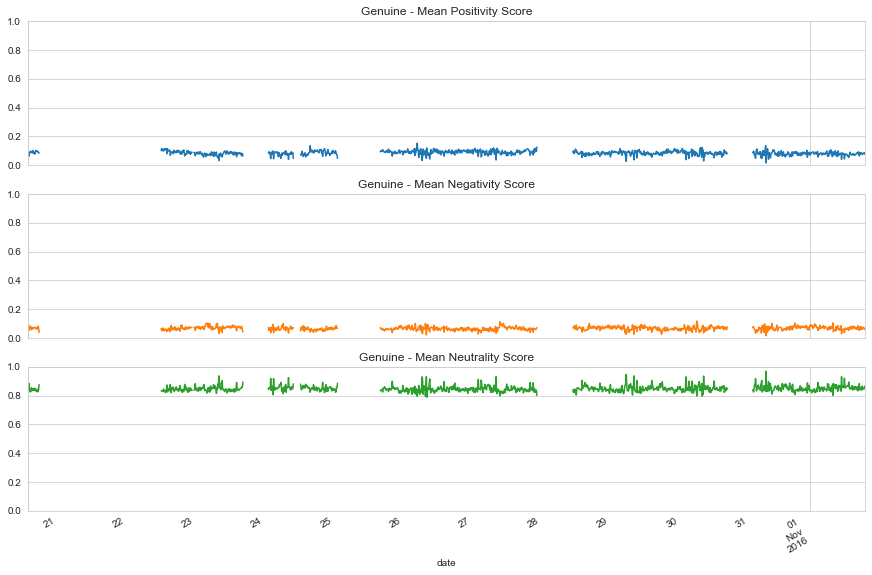

In [71]:
plot_df[['sentiment_pos', 'sentiment_neg', 'sentiment_neu']].resample("10T").mean().plot(subplots=True, title = ["Genuine - Mean Positivity Score", 'Genuine - Mean Negativity Score', 'Genuine - Mean Neutrality Score'], legend=False, figsize=(15,10), ylim = (0.0, 1.0))


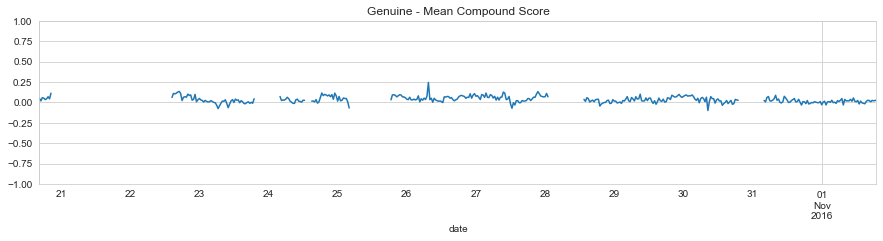

In [72]:
plot_df[['sentiment_compound']].resample("30T").mean().plot(title = "Genuine - Mean Compound Score", legend=False, figsize=(15,3), ylim = (-1.0, 1.0))

In [21]:
s = pd.Series(plot_df.index)

In [25]:
plot_df.index = pd.to_datetime(plot_df.index)

ParserError: Unknown string format: #OctoberSurprise 

In [82]:
plot_df.groupby(pd.Grouper(freq='D')).mean()

,sentiment_pos,sentiment_neg,sentiment_neu,sentiment_compound
date,,,,
2016-10-20 00:00:00+00:00,0.089332,0.069065,0.841604,0.046725
2016-10-21 00:00:00+00:00,0.126500,0.134500,0.739000,0.178675
2016-10-22 00:00:00+00:00,0.093766,0.062422,0.843807,0.077390
2016-10-23 00:00:00+00:00,0.080887,0.072177,0.846930,0.009627
2016-10-24 00:00:00+00:00,0.082474,0.061116,0.856416,0.042656
2016-10-25 00:00:00+00:00,0.091323,0.060880,0.847800,0.069281
2016-10-26 00:00:00+00:00,0.091097,0.066096,0.842807,0.051460
2016-10-27 00:00:00+00:00,0.090189,0.064946,0.844884,0.051406
2016-10-28 00:00:00+00:00,0.082721,0.068531,0.848744,0.021611


In [174]:
test_df3.groupby(['is_retweet', 'has_url']).median()

sentiment_pos  sentiment_neg  sentiment_neu  \
is_retweet has_url                                                
0          0                  0.0            0.0          0.846   
           1                  0.0            0.0          0.928   
1          0                  0.0            0.0          0.857   
           1                  0.0            0.0          0.857   

                    sentiment_compound  
is_retweet has_url                      
0          0                       0.0  
           1                       0.0  
1          0                       0.0  
           1                       0.0

In [175]:
test_df3.groupby(['is_retweet', 'has_url']).mean()

sentiment_pos  sentiment_neg  sentiment_neu  \
is_retweet has_url                                                
0          0             0.093247       0.075142       0.831609   
           1             0.087491       0.064678       0.847844   
1          0             0.085278       0.061941       0.852772   
           1             0.081126       0.071604       0.847271   

                    sentiment_compound  
is_retweet has_url                      
0          0                  0.029071  
           1                  0.025904  
1          0                  0.056029  
           1                  0.016810

## 2. Topic Modeling

In [23]:
df.columns

Index(['date', 'text', 'sentiment_pos', 'sentiment_neg', 'sentiment_neu',
       'sentiment_compound'],
      dtype='object')

In [24]:
df['text_processed'] = df['text'].apply(lambda x: re.sub(r"http\S+", "", str(x)))
df['text_processed'] = df['text_processed'].apply(lambda x: ' '.join(word.strip(string.punctuation) for word in x.split()))
df['text_processed'] = df['text_processed'].apply(lambda x: x.lower())


In [25]:
df['text_processed'].head()

0    rt youngdems4trump crookedhillary and obama cr...
1                           rt salmanrushdie imwithher
2    draintheswamp bernieorbust wikileaks demexit o...
3    rt mattylovesadele america is with you while t...
4    rt stopnuclearwar trump executive finishes d.c...
Name: text_processed, dtype: object

In [31]:
def plot_10_most_common_words(count_data, count_vectorizer, title):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words of ' + title)
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation = 45, ha = 'right') 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

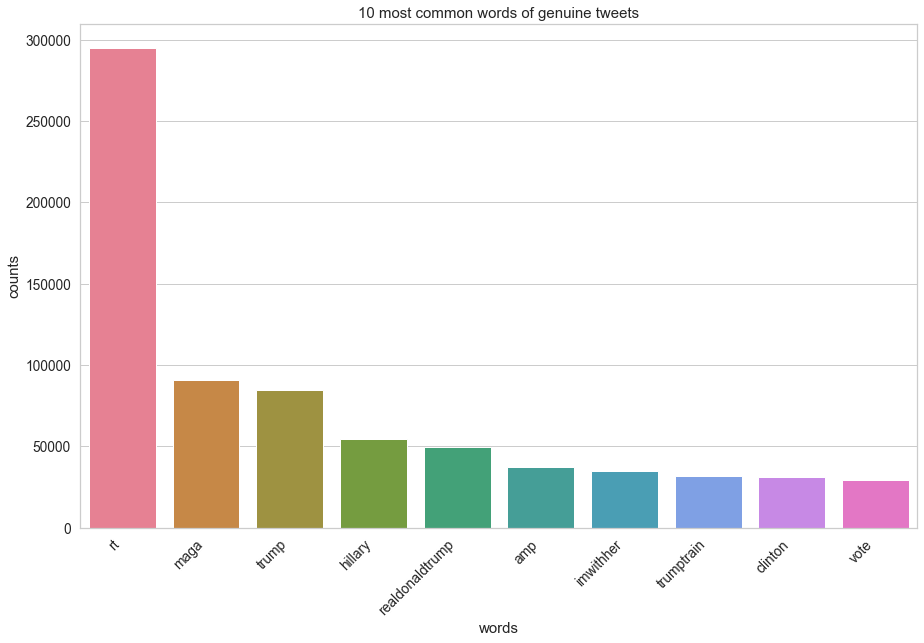

In [32]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df['text_processed'])
plot_10_most_common_words(count_data, count_vectorizer, "genuine tweets")

In [93]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
rt realdonaldtrump crookedhillary maga vote hillary makeamericagreatagain clinton america amp

Topic #1:
rt imwithher hillary hillaryclinton clinton wikileaks emails fbi neverhillary trump

Topic #2:
rt trump donald trump2016 president amp heard hillary trumptrain realdonaldtrump

Topic #3:
rt maga trump trumptrain realdonaldtrump draintheswamp trumppence16 amp trump2016 donald

Topic #4:
rt imwithher maga trump hillary amp hillaryclinton crookedhillary nevertrump cnn


## 3. Breakdown of Types of Tweets

In [166]:
len(test_df3[test_df3['is_retweet'] == 1].index)

289593

In [165]:
len(test_df3[test_df3['has_url'] == 1].index)

248156

In [177]:
test_df3.to_csv("genuine_sentiments.csv", index=False)